---
layout: page
title: Distribuições e Amostragem
nav_order: 14
---
[<img src="https://raw.githubusercontent.com/flaviovdf/fcd/master/assets/colab_favicon_small.png" style="float: right;">](https://colab.research.google.com/github/flaviovdf/fcd/blob/master/_lessons/14-Amostragem.ipynb)

# Tópico 14 – Distribuições e Amostragem
{: .no_toc .mb-2 }

Os conceitos de "distribuição de probabilidade" e "distribuição empírica" são conceitos-chave na quantificação e no entendimento da incerteza nos dados. Nessa aula, vamos aprender a terminologia básica necessária e como incluir a incerteza do processo de amostragem nos nossos resultados.
{: .fs-6 .fw-300 }

{: .no_toc .text-delta }
Resultados Esperados

1. Entender o que são distribuições de probabilidade e distribuições empíricas.
2. Entender a diferença entre populações e amostras.
3. Definir e caracterizar o que são parâmetros e o que são estatísticas.

{: .no_toc .text-delta }
Material Adaptado do [DSC10 (UCSD)](https://dsc10.com/)

In [1]:
# Imports for this lesson.
import numpy as np
import babypandas as bpd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# Imports for animation.
from aux14 import sampling_animation
from IPython.display import display, HTML

## Distribuições de probabilidade vs. distribuições empíricas

### Distribuições de probabilidade

- Considere uma **variável aleatória** tomando diferentes valores, cada um com uma probabilidade diferente.
    - Uma variável aleatória (v.a.) é um _característico numérico de um experimento aleatório_, i.e. que associa valores _numéricos_ a diferentes elementos do _espaço amostral_.
    - Por exemplo, no lançamento de uma moeda, o espaço amostral é $\{H, T\}$. Podemos definir então uma v.a. $X \in \{0, 1\}$, onde $X = 0$ se a moeda for cara ($H$) e $X = 1$ se a moeda for coroa. Como $P(H) = P(T) = 1/2$, temos também $P(X = 0) = P(X = 1) = 1/2$.

- Uma **distribuição de probabilidade** descreve:
    - Todos os possíveis valores da variável aleatória;
    - A probabilidade **teórica** de cada um desses valores.

### Exemplo: Distribuição de probabilidade do lançamento de um dado 🎲

A distribuição nesse caso é **uniforme**, isto é, cada face do dado têm a mesma probabilidade de ocorrência.

In [2]:
die_faces = np.arange(1, 7, 1)
die = bpd.DataFrame().assign(face=die_faces)
die

,face
0,1
1,2
2,3
3,4
4,5
5,6


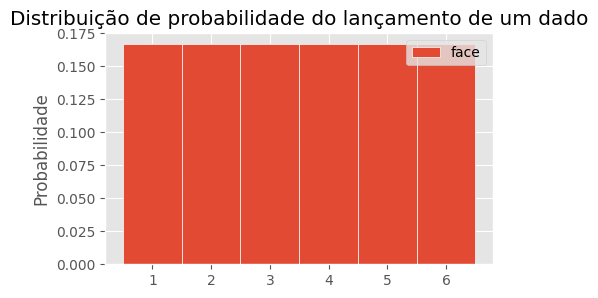

In [3]:
bins = np.arange(0.5, 6.6, 1)

# Note that you can add titles to your visualizations, like this!
die.plot(kind='hist', y='face', bins=bins, density=True, ec='w', 
         title='Distribuição de probabilidade do lançamento de um dado',
         figsize=(5, 3))

# You can also set the y-axis label with plt.ylabel.
plt.ylabel('Probabilidade');

### Distribuições empíricas

- Ao contrário das distribuições de probabilidade, que por definição são _teóricas_, **as distribuições empíricas são baseadas em observações dos dados**.

- Usualmente, essas observações são feitas através de sucessivas repetições de um experimento.

- Uma **distribuição empírica** descreve:
    - Todos os valores observados.
    - A proporção dos experimentos em que cada valor ocorreu.

- Diferentemente das distribuições de probabilidade, as distribuições empíricas representam o que _realmente ocorreu_ na prática. 

### Exemplo: Distribuição empírica do lançamento de um dado 🎲
- Vamos simular o lançamento de um dado utilizando a função `np.random.choice`.
- Para simular o lançamento de um dado, precisamos amostrar **com reposição**.
    - Definiremos "reposição" mais adiante, mas aqui isso significa que se If we roll a 4, we can roll a 4 again.

In [4]:
num_rolls = 25
many_rolls = np.random.choice(die_faces, num_rolls)
many_rolls

array([2, 5, 4, 5, 3, 4, 2, 3, 4, 5, 2, 1, 6, 6, 3, 5, 1, 3, 3, 4, 3, 4,
       5, 3, 1])

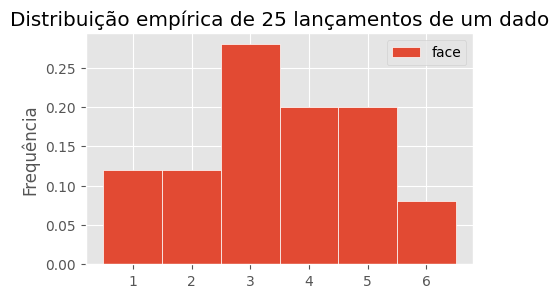

In [5]:
(bpd.DataFrame()
 .assign(face=many_rolls) 
 .plot(kind='hist', y='face', bins=bins, density=True, ec='w',
       title=f'Distribuição empírica de {num_rolls} lançamentos de um dado',
       figsize=(5, 3))
)
plt.ylabel('Frequência');

### Muitos lançamentos de um dado 🎲

O que acontece quando aumentamos o número de lançamentos?

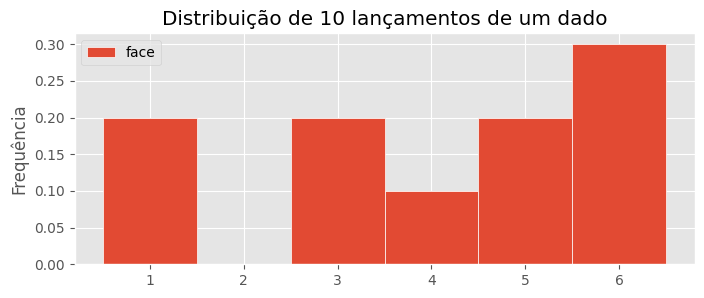

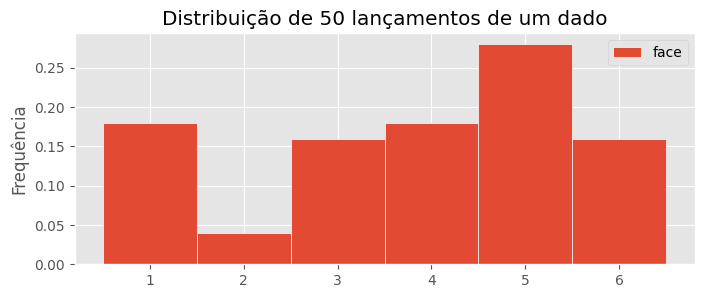

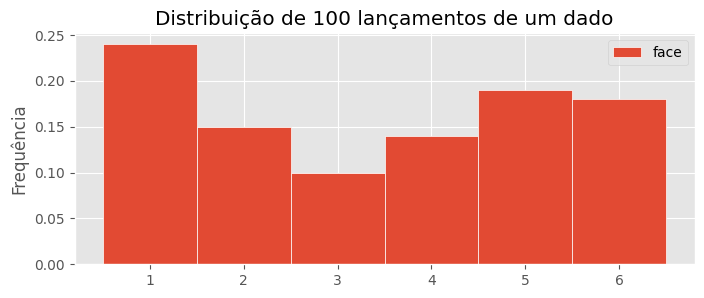

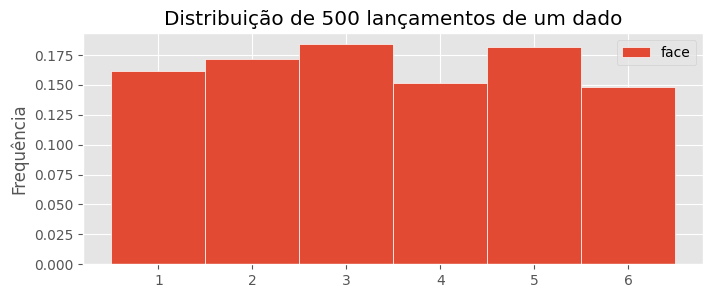

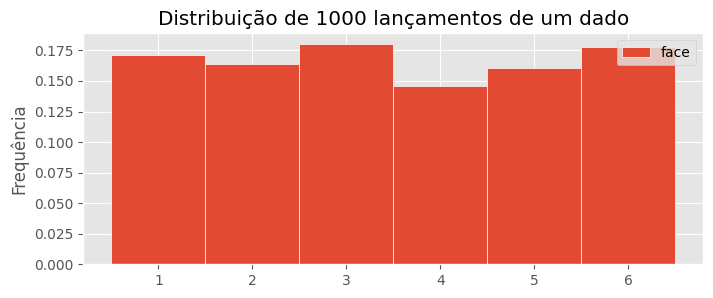

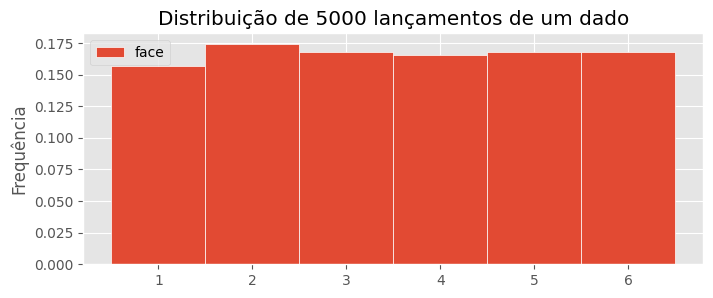

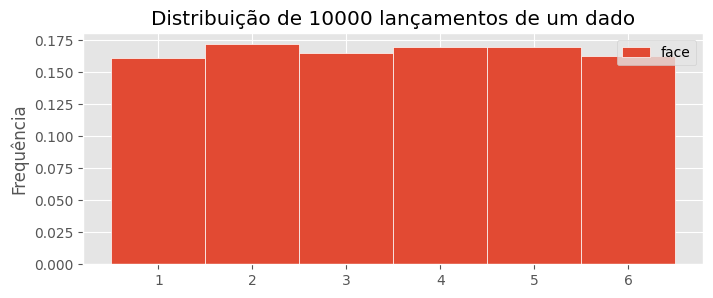

In [6]:
for num_rolls in [10, 50, 100, 500, 1000, 5000, 10000]:
    # Don't worry about how .sample works just yet – we'll cover it shortly.
    (die.sample(n=num_rolls, replace=True)
     .plot(kind='hist', y='face', bins=bins, density=True, ec='w', 
           title=f'Distribuição de {num_rolls} lançamentos de um dado',
           figsize=(8, 3))
    )
    plt.ylabel('Frequência')

### ... e porque isso acontece? ⚖️

A **Lei dos Grandes Números** diz que se um experimento aleatório for repetido 
- um grande número de vezes,
- independentemente,
- e sobre as mesmas condições,

que então a **proporção** do número de vezes que um evento ocorre se aproxima cada vez mais da **probabilidade teórica** desse evento.

- Por exemplo, à medida que lançamos um dado repetidas vezes, a proporção de vezes que obtemos um "5" chega cada vez mais perto de $\frac{1}{6}$.

- A Lei dos Grandes Números **garante** que o uso de simulações para aproximar distribuições de probabilidade esteja correto!

## Amostragem

### Populações e amostras

- Uma **população** é um grupo _completo_ de pessoas, objetos, eventos, etc. sobre o qual queremos aprender algo.

- Na prática, frequentemente não é possível obter informações sobre _todos_ os membros de uma população.

- Nessas situações, tipicamente coletamos uma **amostra**, isto é, um subconjunto da população.

- Com base na amostra coletada, podemos **estimar** alguma quantidade de interesse da população.

### Estratégias de amostragem

- **Problema principal**: Como coletar uma "boa amostra", isto é tal que a **distribuição amostral** seja mais parecida possível com a distribuição populacional?

- **Má ideia ❌**: Amostrar os indivíduos mais "próximos"/"fáceis"
   - Por exemplo, seus colegas de classe, as pessoas em uma fila de supermercado, etc.
   - Esse tipo de amostra é conhecido como _amostra de conveniência_.
   - Amostras de conveniência usualmente contém fontes ocultas de **viés**.

- **Boa ideia ✔️**: Selecionar indivíduos da população de maneira _aleatória_. 

### Amostragem aleatória simples

Uma **amostra aleatória simples** é uma amostra coletada de maneira **uniforme**, **aleatória** e **sem reposição**.
   - "Uniforme" significa que cada indivíduo têm a mesma probabilidade de ser selecionado.
   - "Sem reposição" significa que o mesmo indivíduo não pode ser selecionado mais de uma vez.

### Amostragem de uma lista ou array

Para gerar uma amostra aleatória simples de uma lista ou array `options`, utilizamos a função `np.random.choice(options, n, replace=False)`.

In [7]:
colleges = np.array(['UFMG', 'USP', 'UEMG', 
                     'UNICAMP', 'UFRJ', 'UFPB', 
                     'UFSCar', 'UFSC', 'UFRGS'])

# Simple random sample of 3 colleges.
np.random.choice(colleges, 3, replace=False)

array(['UFRGS', 'UNICAMP', 'UEMG'], dtype='<U7')

Se declararmos `replace=True`, então estamos amostrando uniformemente com reposição.

### Exemplo: Distribuição dos atrasos de vôos ✈️

Para esse exemplo, o DataFrame `united_full` contém informação sobre todos os vôos da United Airlines saindo de SFO entre 6/1/15 and 8/31/15.

No contexto dessa aula, assuma que essa base de dados seja nossa _população_.

In [8]:
united_full = bpd.read_csv('https://raw.githubusercontent.com/flaviovdf/fcd/master/assets/14-Amostragem/data/united_summer2015.csv')
united_full

,Date,Flight Number,Destination,Delay
0,6/1/15,73,HNL,257
1,6/1/15,217,EWR,28
2,6/1/15,237,STL,-3
3,6/1/15,250,SAN,0
4,6/1/15,267,PHL,64
...,...,...,...,...
13820,8/31/15,1978,LAS,-4
13821,8/31/15,1993,IAD,8
13822,8/31/15,1994,ORD,3
13823,8/31/15,2000,PHX,-1


### Amostralindo linhas de um DataFrame

Se quisermos amostrar linhas de um DataFrame, podemos usar o método `.sample`. Isto é,

```py
df.sample(n)
```

retorna um subconjunto aleatório  de `n` linhas de `df`, amostradas **sem reposição** (i.e. o default dessa função é `replace=False`, diferente de `np.random.choice`).

In [9]:
# 5 flights, chosen randomly without replacement.
united_full.sample(5)

,Date,Flight Number,Destination,Delay
10451,8/9/15,580,PDX,18
3930,6/27/15,243,LAX,-1
6981,7/17/15,1453,SEA,0
10880,8/11/15,1947,BWI,61
11975,8/19/15,466,IAH,0


In [10]:
# 5 flights, chosen randomly with replacement.
united_full.sample(5, replace=True)

,Date,Flight Number,Destination,Delay
10875,8/11/15,1928,ORD,47
11958,8/18/15,1960,LAX,-1
10931,8/12/15,624,ORD,81
13121,8/27/15,273,SEA,-7
13538,8/30/15,73,HNL,-1


**Nota**: A probabilidade de observarmos a mesma linha mais de uma vez ao reamostrarmos com reposição nesse caso é baixa, uma vez que aqui o tamanho amostral (5) é pequeno relativo ao tamanho da população (13825).

### O efeito do tamanho amostral

- A Lei dos Grandes Números diz que, à medida que aumentamos o número de repetições de um experimento aleatório, a distribuição empírica se aproxima cada vez mais da distribuição de probabilidade verdadeira (populacional).

- **Como consequência, em um processo de amostragem aleatória simples, quanto maior o nosso tamanho amostral, melhor será nossa aproximação da distribuição de probabilidade populacional.**
    - Tecnicalidades à parte, uma maneira intuitiva de entender esse ponto é enxergar que, como as amostras aleatórias simples são independentes e vêm da mesma população, uma amostra grande pode ser sempre decomposta em várias amostras pequenas.

### Distribuição populacional dos atrasos de vôos ✈️

Aqui estamos interessados apenas nos `'Delay'`s, então selecionaremos apenas essa coluna.

In [11]:
united = united_full.get(['Delay'])
united

,Delay
0,257
1,28
2,-3
3,0
4,64
...,...
13820,-4
13821,8
13822,3
13823,-1


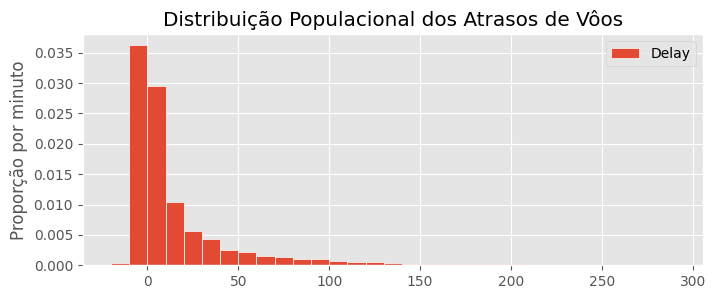

In [12]:
bins = np.arange(-20, 300, 10)
united.plot(kind='hist', y='Delay', bins=bins, density=True, ec='w', 
            title='Distribuição Populacional dos Atrasos de Vôos', figsize=(8, 3))
plt.ylabel('Proporção por minuto');

Note que a distribuição populacional é "determinística" (ou "fixa"), isto é, supondo que o universo de todos os possíveis valores que estamos interessados seja conhecido, não existe aleatoriedade como em um processo de amostragem.

### Distribuição amostral dos atrasos de vôos ✈️

- Aqui, nossa população é composta dos 13825 atrasos de vôos no DataFrame `united`.
- Em geral, porém, raramente temos acesso à população inteira.
- Para replicar uma situação prática real, vamos reamostrar de `united` **sem reposição**.

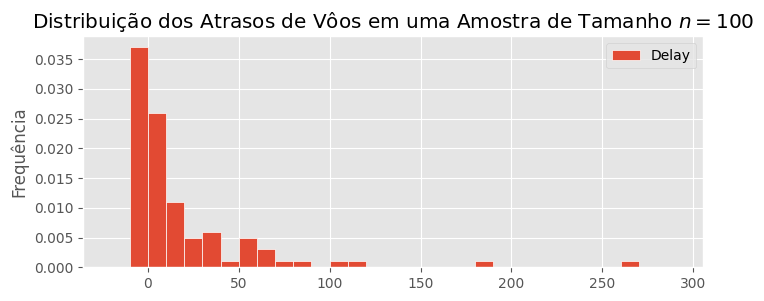

In [13]:
sample_size = 100 # Change this and see what happens!
(united
 .sample(sample_size)
 .plot(kind='hist', y='Delay', bins=bins, density=True, ec='w',
       title=f'Distribuição dos Atrasos de Vôos em uma Amostra de Tamanho $n = {sample_size}$',
       figsize=(8, 3))
)
plt.ylabel('Frequência');

Note que, intuitivamente, à medida que aumentos o tamanho amostral $n$ (`sample_size`), a distribuição amostral dos atrasos fica cada vez mais parecida com a distribuição populacional.

## Parâmetros e estatísticas

### Definições

- **Inferência estatística** é o ato de se tirar conclusões sobre uma população com base nas informações de uma amostra aleatória.

- **Parâmetro**: Uma quantidade de interesse da população.
    - Exemplo 1: A média populacional.
    - Exemplo 2: A proporção populacional.

- **Estatística**: Uma quantidade _calculada_ com base na amostra.
    - Exemplo 1: A média amostral.
    - Exemplo 2: A proporção amostral.

- Uma estatística pode ser utilizada para **estimar** um parâmetro.
  - Como uma função matemática teórica, diz-se que uma estatística nesse caso é um **estimador** para esse parâmetro.
  - Após coletarmos uma amostra, o _valor_ correspondete que a estatística/estimador toma é então uma **estimativa** para o parâmetro.

### Média de atrasos dos vôos ✈️

**Pergunta**: Qual foi a média de atraso entre _todos_ os vôos da United saindo de SFO no verão de 2015? 🤔

- Em geral, gostaríamos de saber a média dos atrasos de vôos na **população** (nosso _parâmetro_), mas na prática teremos disponível apenas uma **amostra**.

- É natural então perguntarmos: como a média dos atrasos dos vôos na **amostra** (isto é, a _estatística_) se compara à média dos atrasos dos vôos na  **população** (nosso _parâmetro_)?

### Média populacional

A **média populacional** é um **parâmetro**.

In [14]:
# Calculate the mean of the population.
united_mean = united.get('Delay').mean()
united_mean

16.658155515370705

A média populacional (assim como a distribuição populacional) também é determinística, ou fixa (i.e. não aleatória), assim como qualquer outro parâmetro. Como quase nunca temos acesso à população completa, em geral não podemos saber com exatidão os valores dos parâmetros sobre os quais estamos interessados.

Em outras palavras, embora os parâmetros sejam _fixos_, em geral eles também são _desconhecidos_.

### Média amostral

A **média amostral** é uma **estatística**. Como estatísticas são funções da amostra (e que por definição é aleatória), a média amostral _também é aleatória_.

In [15]:
# Sample size = 100.
sample_size = 100
united.sample(sample_size).get('Delay').mean()

18.64

- Cada vez que executamos a célula acima, nós estamos:
    - Coletando uma nova amostra aleatória de tamanho $n$ = `sample_size`.
    - Calculando a média amostral correspondente.

- Note que, a cada execução, a média amostral é ligeiramente diferente.
    - Algumas vezes, a média amostral é próxima da média populacional.
    - Algumas vezes, a média amostral é distante da média populacional.

### O efeito do tamanho amostral

E se coletarmos um tamanho de amostra maior?

In [16]:
# Sample size = 1000
sample_size = 1000
united.sample(sample_size).get('Delay').mean()

16.638

- Cada vez que executamos a célula acima, os resultados ainda são ligeiramente diferentes.
- Entretanto, se compararmos à situação anterior em que $n = 100$, as médias amostrais agora são muito mais próximas entre si – e também mais próximas à média populacional.
- **Em geral**, estatísticas calculadas com base em amostras **maiores** são estimadores **melhores** dos parâmetros da população do que quando calculadas em amostras menores.

**Tamanhos de amostra menores**:

![](https://raw.githubusercontent.com/flaviovdf/fcd/master/assets/14-Amostragem/images/bullseye-high.png)

**Tamanhos de amostra maiores**:

![](https://raw.githubusercontent.com/flaviovdf/fcd/master/assets/14-Amostragem/images/bullseye-low.png)

### Distribuição de probabilidade de uma estatística

- O valor numérico de uma estatística, (por exemplo a média amostral) é _aleatório_, porque é calculado com base em uma amostra (que é aleatório).
    - Mais formalmente, estatísticas _também são variáveis aleatórias_.

- Assim como fazemos para variáveis aletaórias em geral, podemos analisar a distribuição de probabilidade _da estatística_ na qual estamos interessados.
    - Essa distribuição é conhecida como **distribuição amostral**.

- A distribuição amostral descreve a probabilidade de todos os possíveis valores de uma estatística.
    - **A distribuição amostral é útil para caracterizar o quão provável é o valor da estatística em uma amostra particular**.
    - De maneira análoga, a distribuição empírica nos permite dizer o quanto o valor da nossa estatística _poderia ter sido_ caso tívessemos coletado uma amostra diferente.

- Infelizmente, porém, a distribuição empírica pode ser difícil de se caracterizar de maneira exata/analítica.
- Temos então basicamente 2 maneiras de encontramos essa distribuição:
    - Opção 1: Desenvolver uma expressão geral matematicamente (nos casos em que isso é possível).
    - Opção 2: Gerar **todas** as possíveis amostras e calcular o valor da estatística para cada amostra.

- Nesse curso, focaremos na Opção 2, isto é, utilizaremos simulação para aproximar a distribuição amostral das estatísticas nas quais estamos interessados.
    - A Opção 1 será o assunto de vários dos cursos de Estatística mais adiante!

### Distribuição empírica de uma estatística

- A distribuição empírica de uma estatística é obtida com base nos valores simulados de uma estatística. Essa distribuição descreve:    
    - Todos os valores _observados_ da estatística.
    - A frequência/proporção de amostras em que cada valor foi observado.

- Em geral, a distribuição empírica de uma estatística se torna uma aproximação cada vez melhor para a distribuição amostral daquela estatística (i.e. a verdadeira distribuição de probabilidades da estatística) **à medida que o número de repetições da simulação é cada vez maior**.

### Distribuição das médias amostrais

- Para entendermos o quão diferente o valor da média amostral pode ser em diferentes amostras, nós faremos o seguinte:
    - Geramos muitas amostras aleatoriamente;
    - Calculamos a média amostral em cada uma das amostras;
    - Fazemos um histograma com os valores obtidos.

- A animação abaixo contém uma visualização do seguinte processo, repetido várias vezes:
    - 1.) gerar $n = 1000$ atrasos de vôos de `united';
    - 2.) calcular a média amostral correspondente;
    - 3.) agregar o valor à um histograma.

In [17]:
%%capture
anim, anim_means = sampling_animation(united, 1000);

In [18]:
HTML(anim.to_jshtml())

### Mas afinal, para que serve a distribuição empírica de uma estatística?

- Na prática, coletamos apenas _uma_ amostra, da qual calculamos apenas _um_ valor da estatística.
    - Em certos casos, a amostra pode ser suficientemente representativa da população, e o valor da estatística será próximo ao parâmetro que estamos tentando estimar.
    - Quando isso não acontece, porém, i.e. quando a amostra não é tão representativa da população, o valor da estatística pode ser bem diferente do parâmetro de interesse.

- Dessa forma, a distribuição empírica de uma estatística nos ajuda a responder à seguinte pergunta: **qual seria o valor da estatística caso tívessemos coletado uma amostra diferente?**

### E qual o papel do tamanho amostral nesse processo?

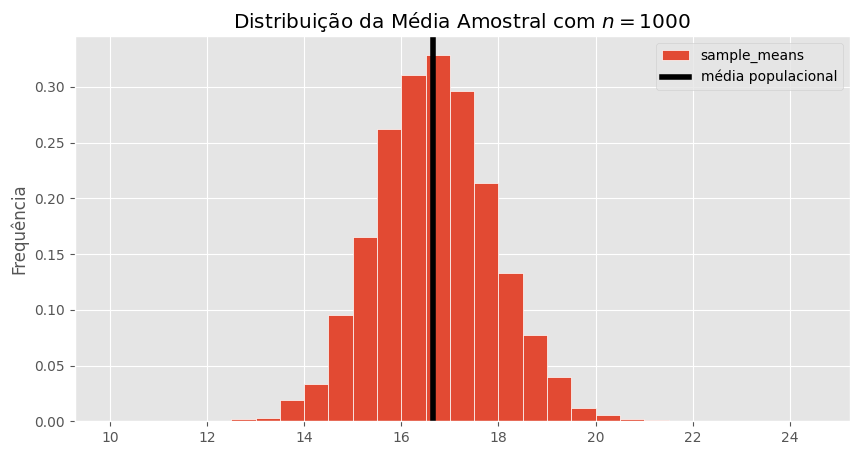

In [19]:
# Sample one thousand flights, two thousand times.
sample_size = 1000
repetitions = 2000
sample_means = np.array([])

for n in np.arange(repetitions):
    m = united.sample(sample_size).get('Delay').mean()
    sample_means = np.append(sample_means, m)

bpd.DataFrame().assign(sample_means=sample_means) \
               .plot(kind='hist', bins=np.arange(10, 25, 0.5), density=True, ec='w',
                     title=f'Distribuição da Média Amostral com $n = {sample_size}$',
                     figsize=(10, 5));
    
plt.axvline(x=united_mean, c='black', linewidth=4, label='média populacional')
plt.legend()
plt.ylabel('Frequência');

### Teste Rápido ✅

No exemplo acima, amostramos amostras de vôos de tamanho **$n = 1000$** um número **$B = 2000** de vezes. Se ao invés disso continuarmos amostrando **$B = 2000** vezes, mas agora amostras de tamanho $n = 100$, qual você acha que será o efeito sobre a distribuição empírica da média amostral? 

- A.  Ficará mais estreita  
- B.  Ficará mais larga
- C.  Será deslocada para a esquerda  
- D.  Será deslocada para a direita
- E.  Nenhum

### A maneira como amostramos importa!

* Até agora, assumimos que estamos coletando apenas **amostras aleatórias simples** da população de interesse.
    * Recorde que amostras aleatórias simples são tomadas sem reposição.
    * Entretanto, se a população for grande o suficiente (possivelmente infinita...), amostragens sem e com reposição serão equivalentes.

* A média amostral, sob amostragem aleatória simples, é uma boa aproximação para a média populacional.

* Mas isso nem sempre é verdade se amostrarmos de maneira diferente!
    * Voltaremos à esse ponto depois, mas uma situação importante onde isso pode acontecer é quando o processo de amostragem é **enviesado** (você consegue pensar em um exemplo simples disso?).  

## Resumo e próxima aula

### Resumo

- A **distribuição de probabilidade** de uma _variável aleatória_ descreve a probabilidade de cada possível valor dessa variável.
- Uma **distribuição empírica** descreve a frequência/proporção com a qual cada valor de um experimento aleatório ocorre.
    - Quanto mais repetimos o experimento aleatório, mais a distribuição empírica se aproxima da distribuição de probabilidade.
- A **distribuição populacional** descreve as probabilidades associadas aos valores de uma certa característica de interesse de uma população.
- Uma **distribuição amostral** descreve as probabilidades associadas aos valores de uma certa característica da **amostra**, que é um _subconjunto_ da população.
    - Quando coletamos uma amostra aleatória simples da população, à medida que o tamanho amostral $n$ aumenta, mais a distribuição amostral se aproxima da distribuição populacional.
- Um **parâmetro** é uma quantidade de interesse da **população**, enquanto uma **estatística** é uma quantidade de interesse da **amostra**.
- Em geral, podemos utilizar estatísticas para **estimar** parâmetros da população.
    - Por exemplo, para estimar a média populacional, podemos utilizar a média amostral.
    - Usualmente, amostras de tamanhos maiores levam à estimativas mais precisas.

### Próxima aula

- Maiores tamanhos de amostra levam à estimativas mais precisas, mas como balancear essa precisão com o custo e outros desafios de ordem prática na hora de coletar amostras "grandes"? 
- Introduziremos nesse contexto uma solução criativa denominada _bootstrapping_ 🥾, que nos permite ter alguns dos benefícios de uma amostra maior do que a coletada para melhorar nossas estimativas!